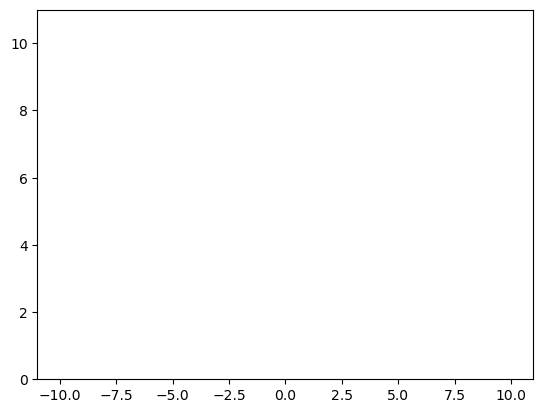

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Tower parameters
num_layers = 10
base_width = 20
height_per_layer = 1

# Create figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-base_width/2 - 1, base_width/2 + 1)
ax.set_ylim(0, num_layers * height_per_layer + 1)

# Initialize empty list for rectangles
rects = []

# Function to draw each layer of the tower
def draw_layer(ax, width, height, y_offset):
    rect = plt.Rectangle((-width / 2, y_offset), width, height, color='sandybrown')
    rects.append(rect)
    ax.add_patch(rect)

# Animation update function
def update(num):
    ax.clear()
    ax.set_xlim(-base_width/2 - 1, base_width/2 + 1)
    ax.set_ylim(0, num_layers * height_per_layer + 1)
    current_width = base_width - num * (base_width / num_layers)
    for i in range(num + 1):
        draw_layer(ax, current_width + i * (base_width / num_layers) / 2, height_per_layer, i * height_per_layer)

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_layers, repeat=False)

# Display animation
plt.show()


/opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


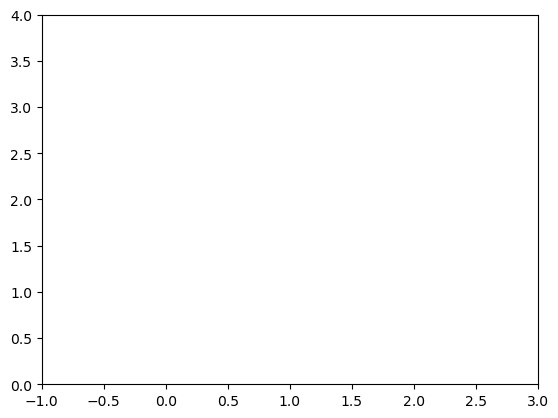

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 初期設定
num_disks = 3
pegs = [list(range(num_disks, 0, -1)), [], []]
moves = []

def move_disk(from_peg, to_peg):
    disk = pegs[from_peg].pop()
    pegs[to_peg].append(disk)
    moves.append((from_peg, to_peg))

def hanoi(n, source, target, auxiliary):
    if n == 1:
        move_disk(source, target)
        return
    hanoi(n-1, source, auxiliary, target)
    move_disk(source, target)
    hanoi(n-1, auxiliary, target, source)

# ハノイの塔を解く
hanoi(num_disks, 0, 2, 1)

# アニメーションの設定
fig, ax = plt.subplots()
ax.set_xlim(-1, 3)
ax.set_ylim(0, num_disks + 1)
rects = [ax.bar([0, 1, 2], [0, 0, 0], width=0.5)[0] for _ in range(num_disks)]

def update(frame):
    from_peg, to_peg = moves[frame]
    for rect, peg in zip(rects, pegs):
        heights = [0] * 3
        for i, disks in enumerate(pegs):
            if disks:
                heights[i] = max(disks)
        rect.set_height(heights)

ani = animation.FuncAnimation(fig, update, frames=len(moves), repeat=False)
plt.show()


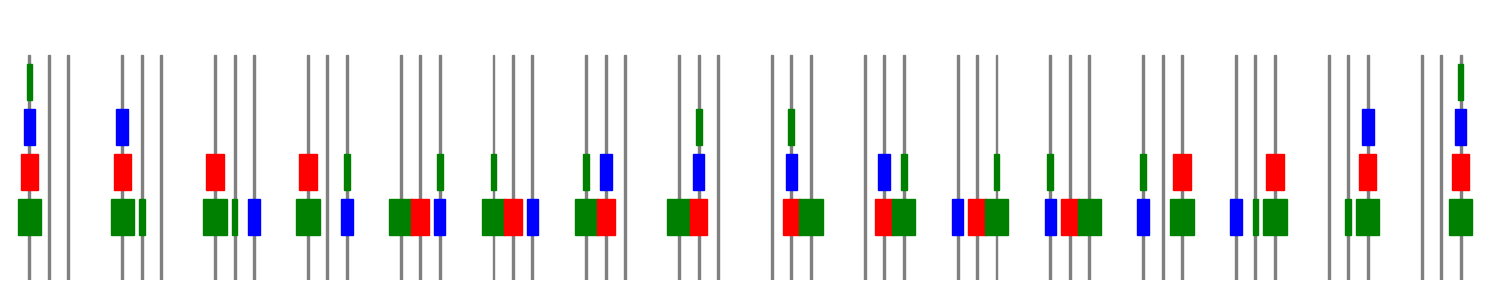

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 初期設定
num_disks = 4
pegs = [list(range(num_disks, 0, -1)), [], []]

# 各ステップを保存するリスト
steps = []

def save_step(pegs):
    steps.append([list(peg) for peg in pegs])

def move_disk(from_peg, to_peg, pegs):
    disk = pegs[from_peg].pop()
    pegs[to_peg].append(disk)
    save_step(pegs)

def hanoi(n, source, target, auxiliary, pegs):
    if n == 1:
        move_disk(source, target, pegs)
    else:
        hanoi(n-1, source, auxiliary, target, pegs)
        move_disk(source, target, pegs)
        hanoi(n-1, auxiliary, target, source, pegs)

# 初期状態を保存
save_step(pegs)

# ハノイの塔を解く
hanoi(num_disks, 0, 2, 1, pegs)

# 図を描画
fig, axes = plt.subplots(1, len(steps), figsize=(15, 3))

peg_colors = ['red', 'green', 'blue']
for ax, step in zip(axes, steps):
    ax.set_xlim(-1, 3)
    ax.set_ylim(0, num_disks + 2)
    ax.axis('off')
    for i, peg in enumerate(step):
        ax.add_patch(patches.Rectangle((i - 0.05, 0), 0.1, num_disks + 1, color='gray'))
        for j, disk in enumerate(peg):
            width = disk * 0.3
            ax.add_patch(patches.Rectangle((i - width / 2, j + 1), width, 0.8, color=peg_colors[disk % 3]))

plt.tight_layout()
plt.show()


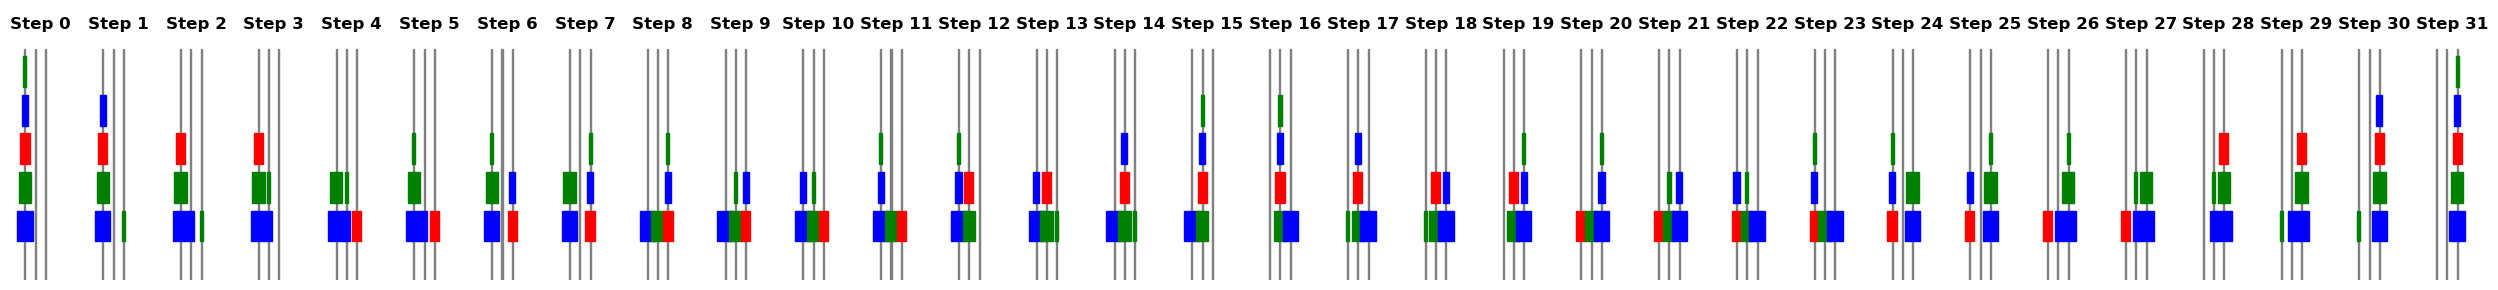

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 初期設定
num_disks = 5
pegs = [list(range(num_disks, 0, -1)), [], []]

# 各ステップを保存するリスト
steps = []

def save_step(pegs):
    steps.append([list(peg) for peg in pegs])

def move_disk(from_peg, to_peg, pegs):
    disk = pegs[from_peg].pop()
    pegs[to_peg].append(disk)
    save_step(pegs)

def hanoi(n, source, target, auxiliary, pegs):
    if n == 1:
        move_disk(source, target, pegs)
    else:
        hanoi(n-1, source, auxiliary, target, pegs)
        move_disk(source, target, pegs)
        hanoi(n-1, auxiliary, target, source, pegs)

# 初期状態を保存
save_step(pegs)

# ハノイの塔を解く
hanoi(num_disks, 0, 2, 1, pegs)

# 図を描画
fig, axes = plt.subplots(1, len(steps), figsize=(25, 3))

peg_colors = ['red', 'green', 'blue']
for idx, (ax, step) in enumerate(zip(axes, steps)):
    ax.set_xlim(-1, 3)
    ax.set_ylim(0, num_disks + 2)
    ax.axis('off')
    ax.text(1.5, num_disks + 1.5, f'Step {idx}', horizontalalignment='center', fontsize=12, weight='bold')
    for i, peg in enumerate(step):
        ax.add_patch(patches.Rectangle((i - 0.05, 0), 0.1, num_disks + 1, color='gray'))
        for j, disk in enumerate(peg):
            width = disk * 0.3
            ax.add_patch(patches.Rectangle((i - width / 2, j + 1), width, 0.8, color=peg_colors[disk % 3]))

plt.tight_layout()
plt.show()


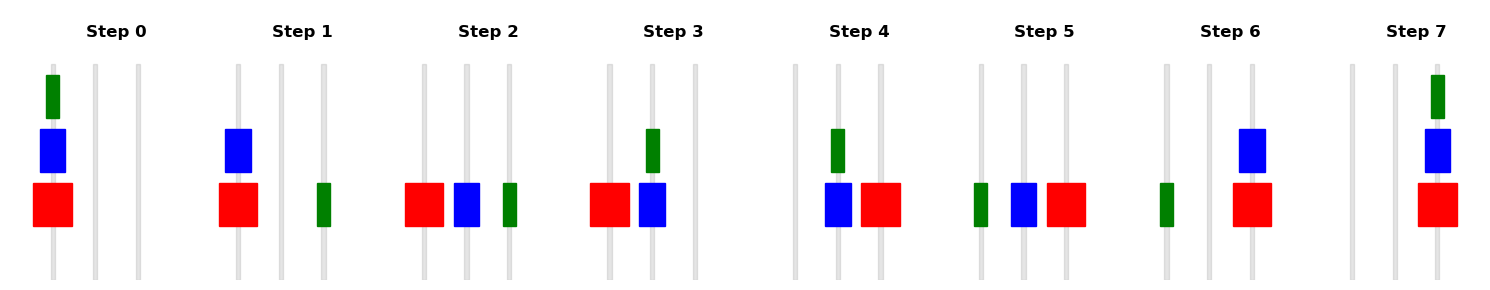

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 初期設定
num_disks = 3
pegs = [list(range(num_disks, 0, -1)), [], []]

# 各ステップを保存するリスト
steps = []

def save_step(pegs):
    steps.append([list(peg) for peg in pegs])

def move_disk(from_peg, to_peg, pegs):
    disk = pegs[from_peg].pop()
    pegs[to_peg].append(disk)
    save_step(pegs)

def hanoi(n, source, target, auxiliary, pegs):
    if n == 1:
        move_disk(source, target, pegs)
    else:
        hanoi(n-1, source, auxiliary, target, pegs)
        move_disk(source, target, pegs)
        hanoi(n-1, auxiliary, target, source, pegs)

# 初期状態を保存
save_step(pegs)

# ハノイの塔を解く
hanoi(num_disks, 0, 2, 1, pegs)

# 図を描画
fig, axes = plt.subplots(1, len(steps), figsize=(15, 3))

peg_colors = ['red', 'green', 'blue']
for idx, (ax, step) in enumerate(zip(axes, steps)):
    ax.set_xlim(-1, 3)
    ax.set_ylim(0, num_disks + 2)
    ax.axis('off')
    ax.text(1.5, num_disks + 1.5, f'Step {idx}', horizontalalignment='center', fontsize=12, weight='bold')
    for i, peg in enumerate(step):
        ax.add_patch(patches.Rectangle((i - 0.05, 0), 0.1, num_disks + 1, color='gray', alpha=0.2))
        for j, disk in enumerate(peg):
            width = disk * 0.3
            ax.add_patch(patches.Rectangle((i - width / 2, j + 1), width, 0.8, color=peg_colors[disk % 3]))

plt.tight_layout()
plt.show()
